In [61]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import model_selection
import matplotlib_inline

In [75]:
df=pd.read_csv("credit card taiwan svm algorithm.csv")

In [76]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [78]:
df.shape

(30000, 25)

In [79]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Null Value Handling 

In [95]:
missing=df.AGE.mean()

In [96]:
df.AGE=df.AGE.fillna(missing)

In [97]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [98]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

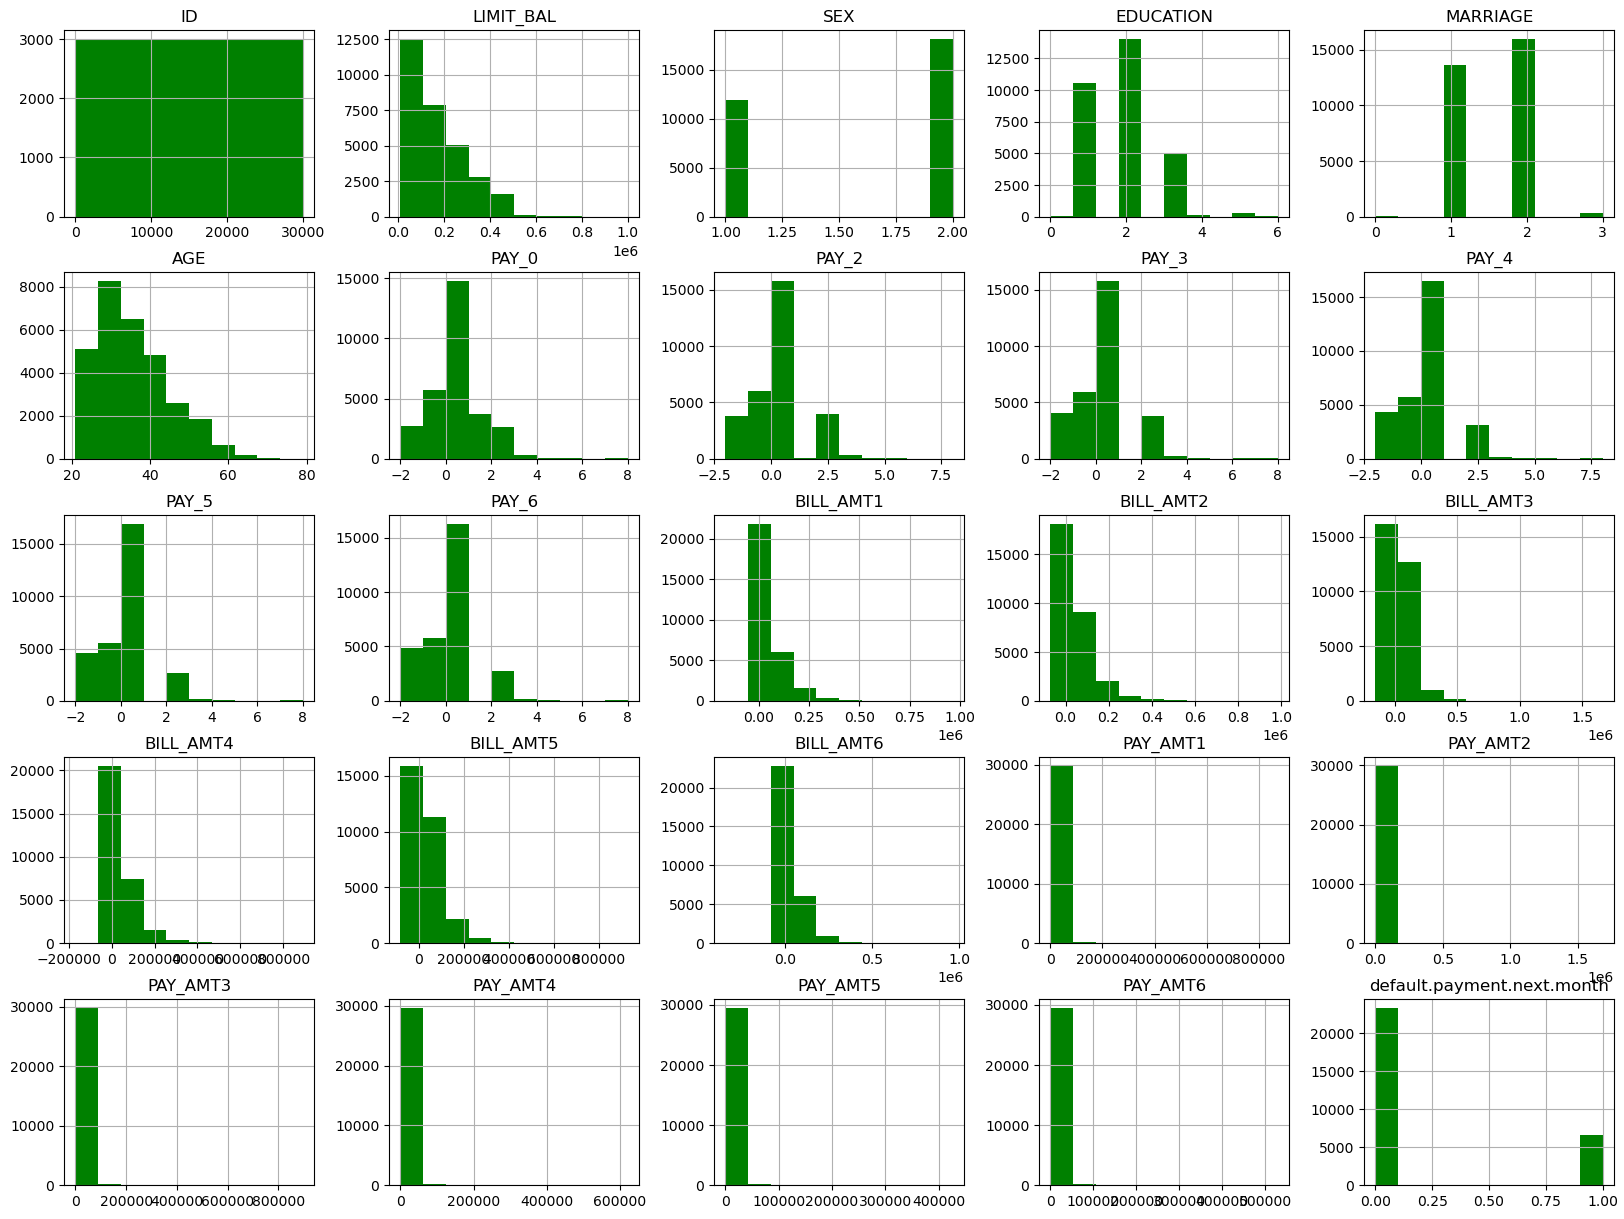

In [99]:
df.hist(figsize=(20,15), color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

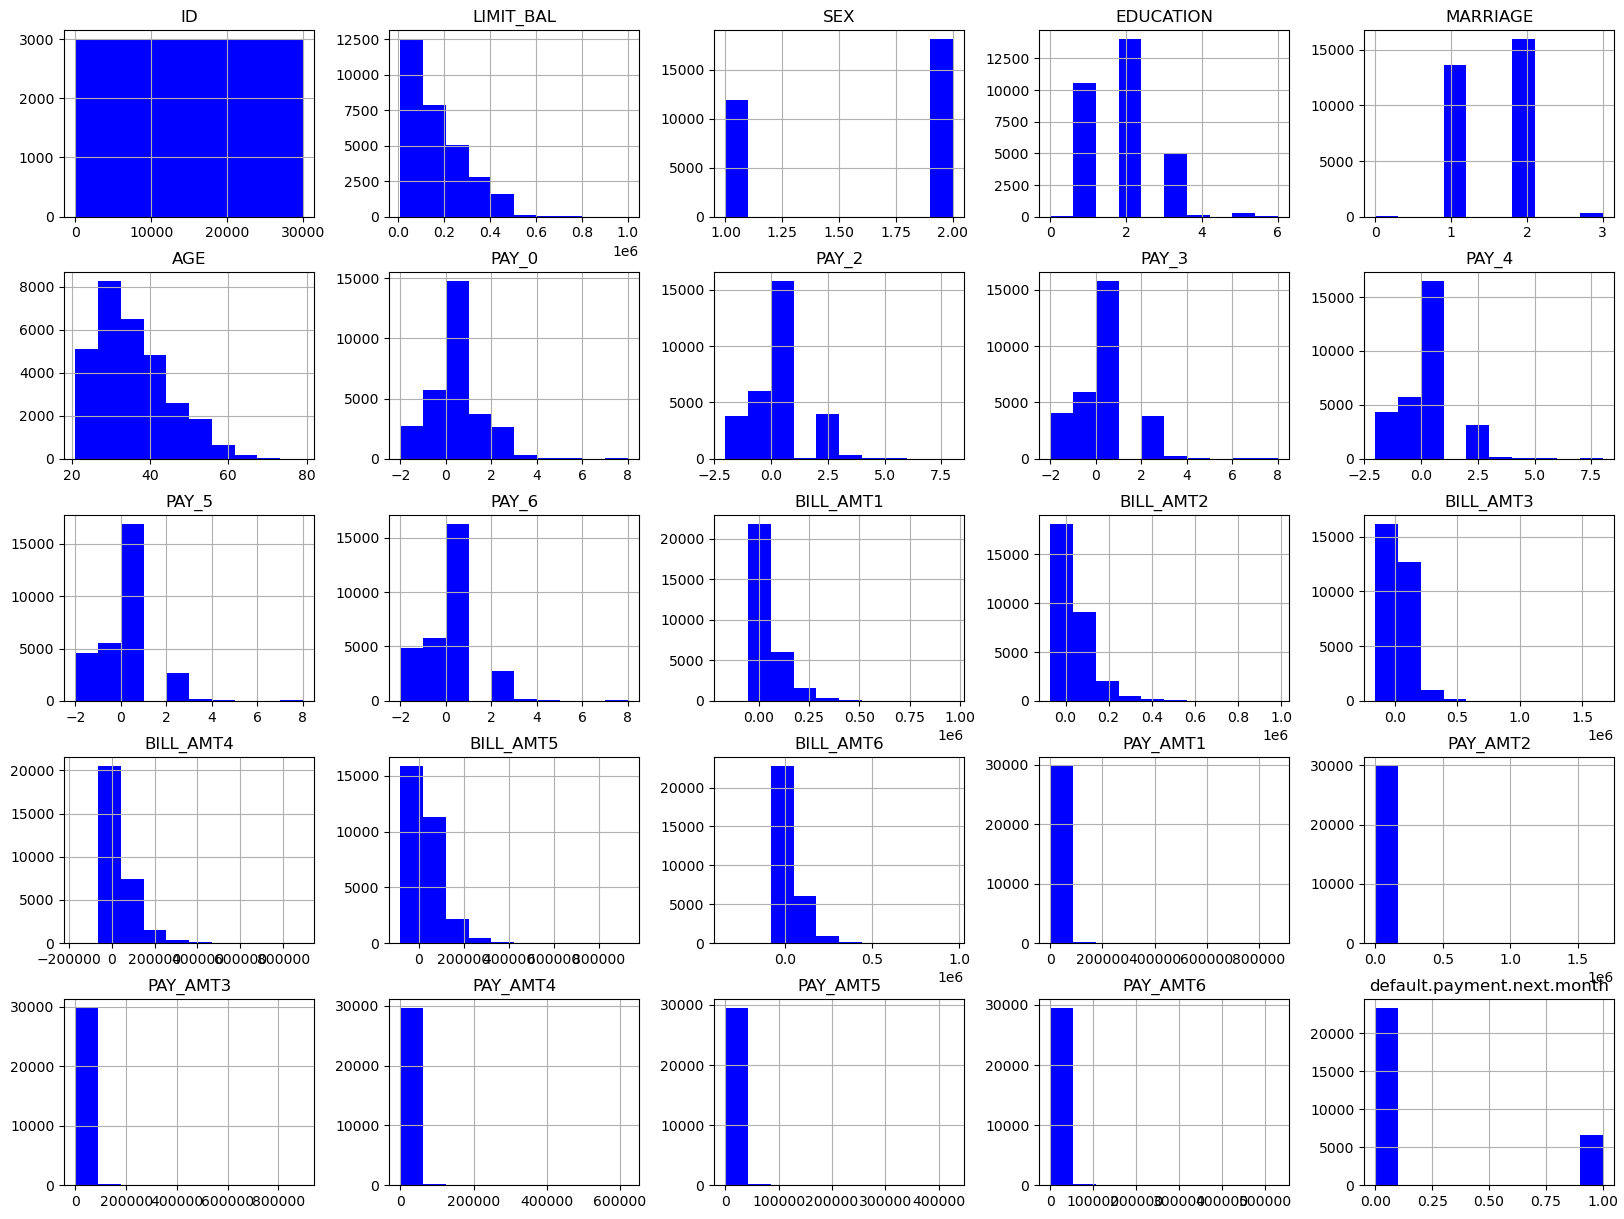

In [100]:
df.hist(figsize=(20,15), color='blue')
plt.show

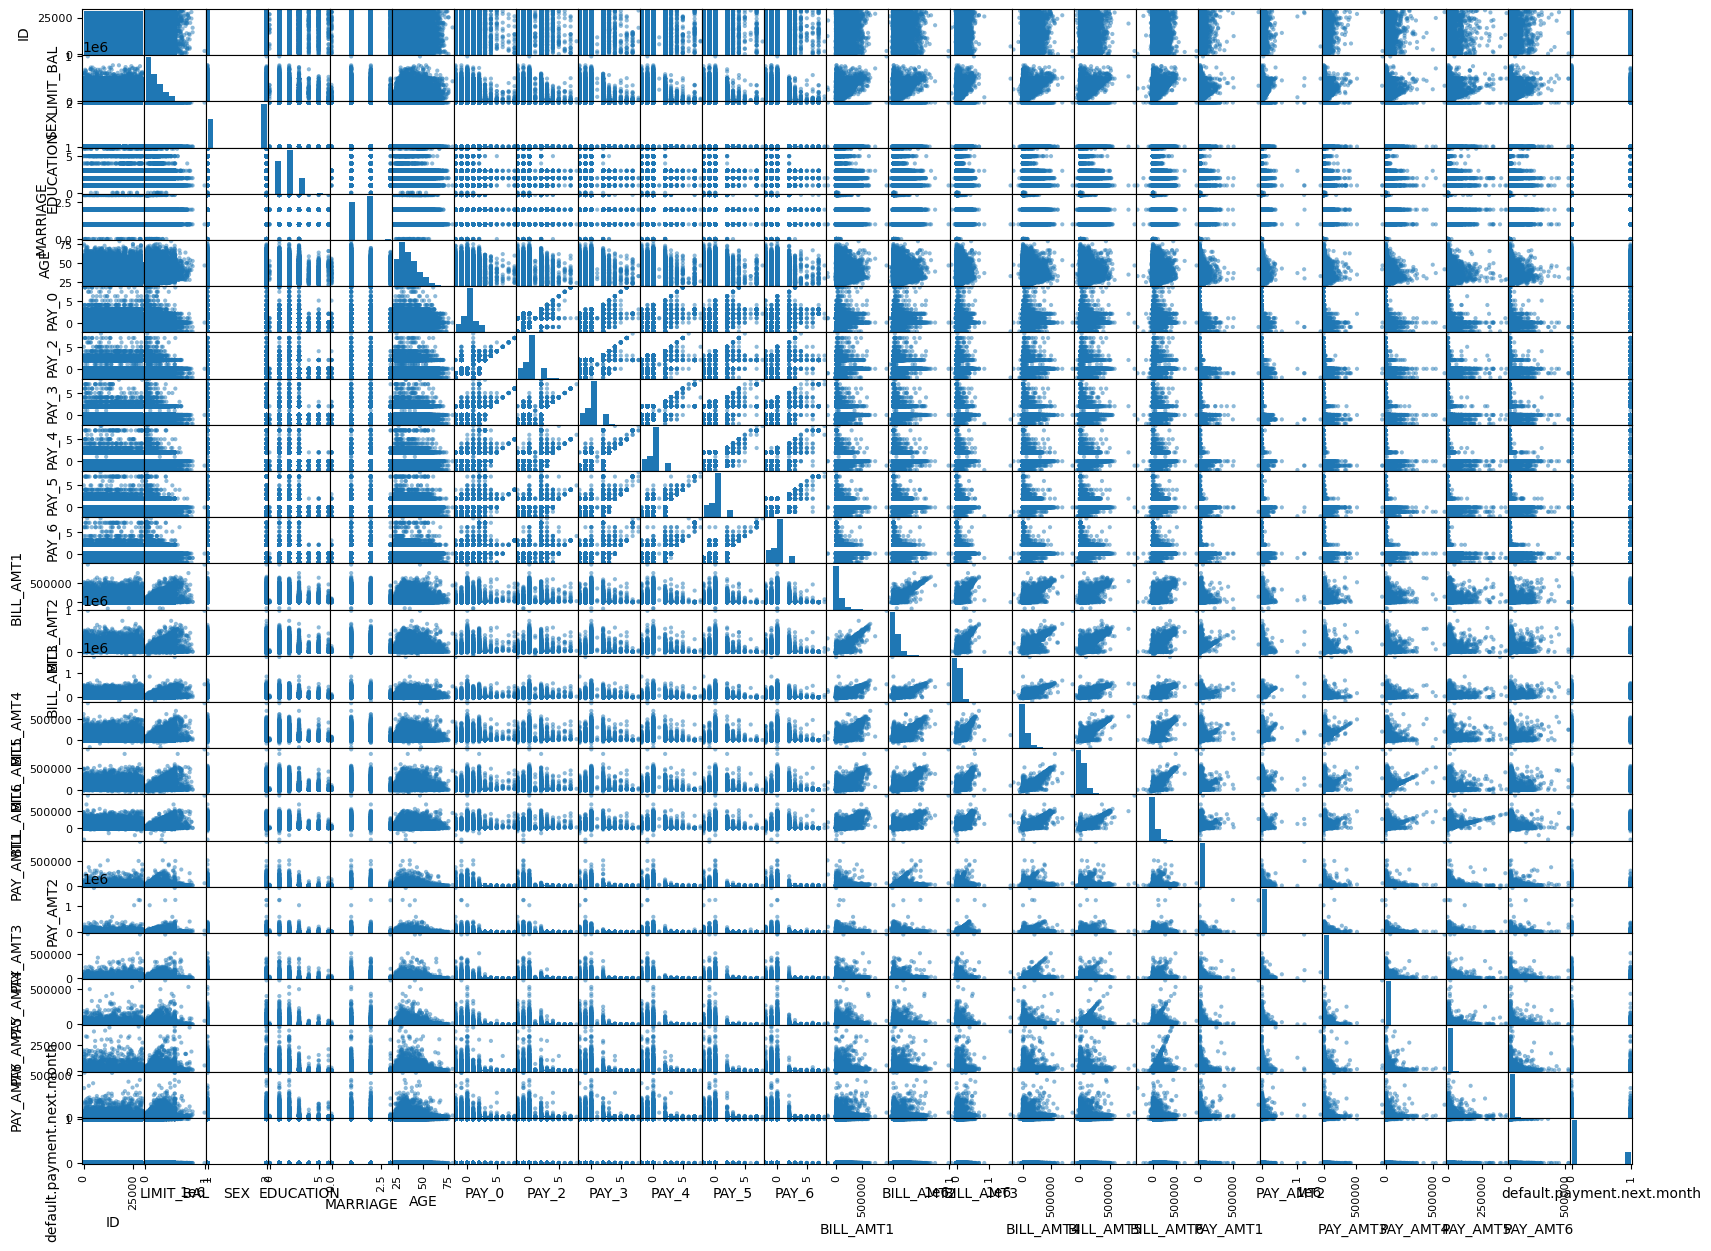

In [101]:
#Scattering the Plot
scatter_matrix(df, figsize = (20, 15))
plt.show()

<AxesSubplot:>

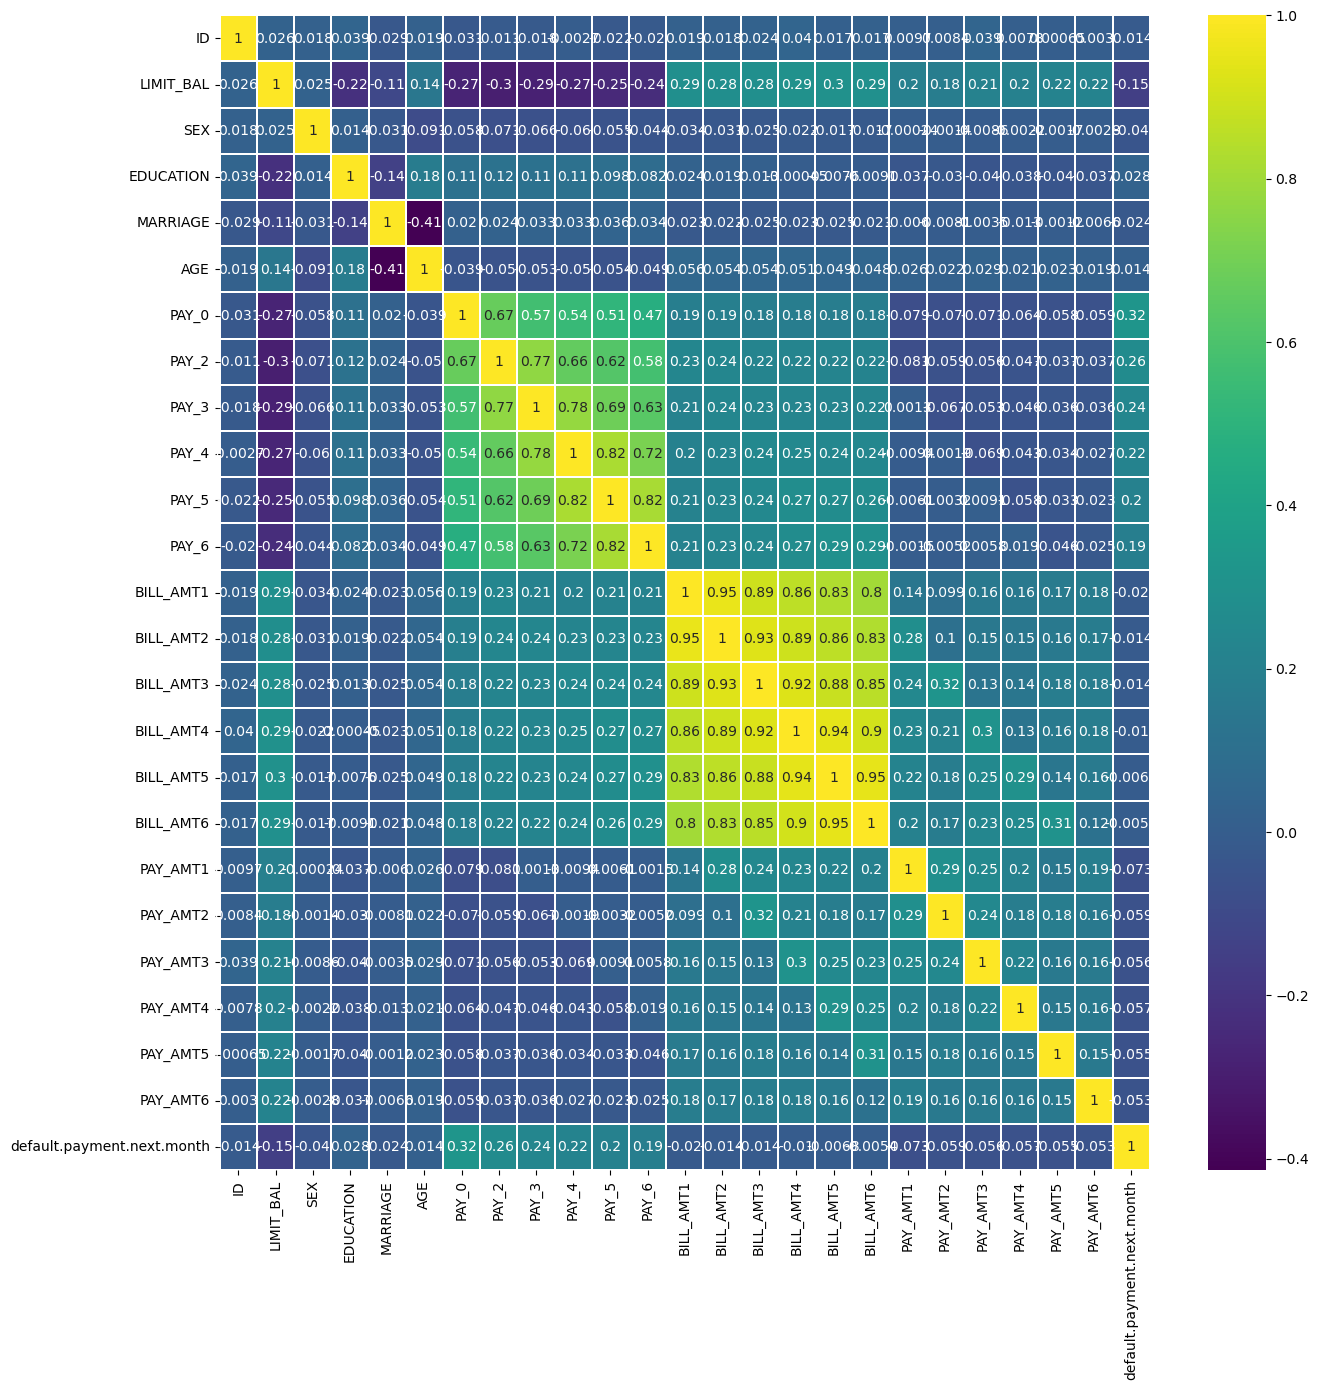

In [102]:
#Correlation Matrix
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

In [103]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Dividing Features and Label Comuns

In [104]:
df.drop('default.payment.next.month', axis='columns')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [105]:
x=df.drop('default.payment.next.month', axis='columns')

In [106]:
y=df['default.payment.next.month']

In [107]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.000000,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.000000,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,35.485499,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,35.485499,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.000000,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.000000,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.000000,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.000000,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.000000,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# Dividing Data into Training and Testing

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

In [110]:
xtrain

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4936,4937,20000.0,1,1,2,24.0,-1,-1,-1,-1,...,390.0,780.0,0.0,0.0,390.0,390.0,780.0,0.0,0.0,0.0
4788,4789,120000.0,1,2,1,52.0,2,0,0,0,...,105262.0,46605.0,45590.0,46204.0,4449.0,2731.0,3000.0,5000.0,3000.0,3000.0
8447,8448,70000.0,2,2,2,26.0,0,0,0,0,...,26103.0,28342.0,24894.0,25272.0,3003.0,5106.0,4026.0,755.0,1029.0,5303.0
4535,4536,230000.0,1,2,2,37.0,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27563,27564,130000.0,1,2,2,56.0,0,0,0,0,...,111780.0,116357.0,96936.0,98173.0,4000.0,5000.0,8000.0,4000.0,4000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17289,17290,170000.0,2,3,1,40.0,1,2,0,0,...,20619.0,19520.0,5200.0,0.0,0.0,2000.0,1136.0,1000.0,0.0,36679.0
5192,5193,330000.0,2,1,1,41.0,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12172,12173,50000.0,1,2,2,22.0,0,0,0,0,...,35458.0,19778.0,19929.0,19790.0,1707.0,1321.0,687.0,705.0,811.0,874.0
235,236,80000.0,1,1,2,35.0,-1,-1,-1,-1,...,6848.0,1719.0,1378.0,19942.0,3983.0,6853.0,1719.0,1378.0,19942.0,2418.0


In [111]:
ytrain

4936     0
4788     0
8447     1
4535     1
27563    0
        ..
17289    1
5192     0
12172    0
235      0
29733    0
Name: default.payment.next.month, Length: 21000, dtype: int64

# Model Developing using Support Vector Machine

In [112]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)

SVC()

In [113]:
svm=SVC()

In [114]:
svm.fit(xtrain,ytrain)

SVC()

In [115]:
pred = svm.predict(xtest)

In [116]:
svmsr = svm.score(xtest, ytest)

# Peformance Calculation of Support Vector Machine

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
ac1 = accuracy_score(ytest, pred)

In [119]:
print ('Accuracy of Support Vector Machine is: ', ac1 * 100, '%')

Accuracy of Support Vector Machine is:  77.77777777777779 %


In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
cm1 = confusion_matrix(ytest, pred)

In [122]:
print (cm1)

[[7000    0]
 [2000    0]]


In [123]:
#Visualization of the Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual Label')

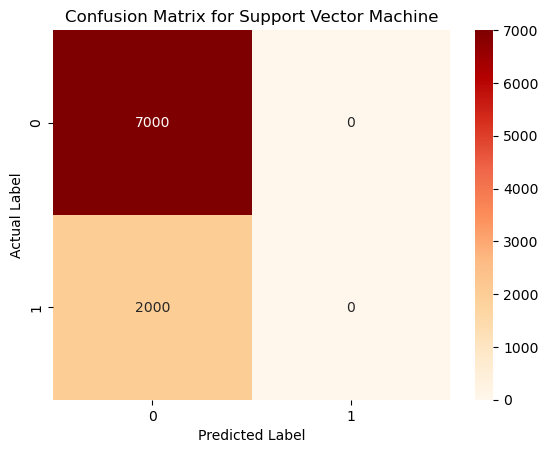

In [124]:
p = sns.heatmap(pd.DataFrame(cm1), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label') 

In [125]:
from sklearn.metrics import classification_report

In [126]:
cr1 = classification_report(ytest, pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
print (cr1)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



# Model Developing using Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier 

In [129]:
rf = RandomForestClassifier(n_estimators = 100)

In [130]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [131]:
pred = rf.predict(xtest)

In [132]:
#Performance Calculation

In [133]:
from sklearn.metrics import accuracy_score
as2 = accuracy_score(ytest, pred)
print ('Accuracy of Random Forest is: ', as2 * 100, '%')

Accuracy of Random Forest is:  81.77777777777779 %


In [134]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(ytest, pred)
print (cm2)

[[6634  366]
 [1274  726]]


Text(50.722222222222214, 0.5, 'Actual Label')

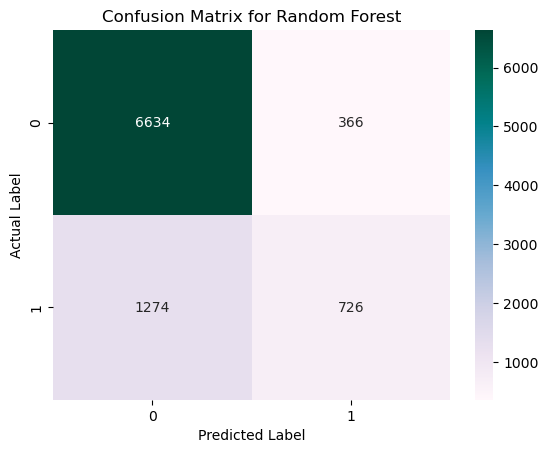

In [135]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [136]:
from sklearn.metrics import classification_report
cr2 = classification_report(ytest, pred)
#Printing Classification Report
print (cr2)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.36      0.47      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Developing using Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [138]:
dt.predict(xtest)

array([0, 0, 0, ..., 0, 1, 0])

In [139]:
dt.score(xtest, ytest)

0.7203333333333334

In [ ]:
#Performance Calculation

In [140]:
from sklearn.metrics import accuracy_score

In [142]:
ac3 = accuracy_score(ytest, pred)
print ('Accuracy of Decision Tree is: ', ac3 * 100, '%')

Accuracy of Decision Tree is:  81.77777777777779 %


In [144]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(ytest, pred)
print (cm3)

[[6634  366]
 [1274  726]]


Text(50.722222222222214, 0.5, 'Actual Label')

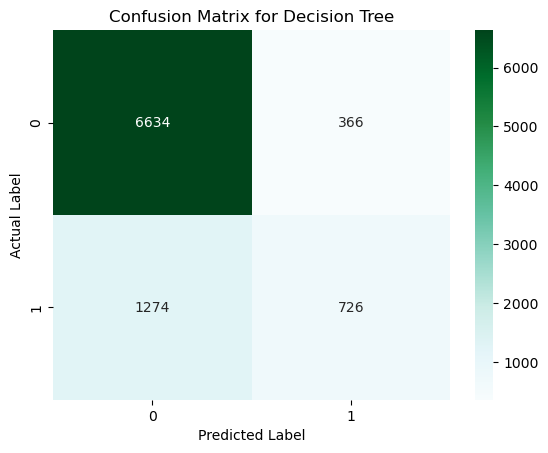

In [145]:
p = sns.heatmap(pd.DataFrame(cm3), annot = True, cmap = 'BuGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [146]:
from sklearn.metrics import classification_report
cr3 = classification_report(ytest, pred)
print (cr3)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.36      0.47      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Model Developing using Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [154]:
pred=lr.predict(xtest)

In [155]:
lr.score(xtest, ytest)

0.7777777777777778

In [156]:
#Performance Calculation

In [157]:
from sklearn.metrics import accuracy_score
ac4 = accuracy_score(ytest, pred)
print ('Accuracy of Logistic Regression is: ', ac4 * 100, '%')

Accuracy of Logistic Regression is:  77.77777777777779 %


In [159]:
from sklearn.metrics import confusion_matrix
cf4 = confusion_matrix(ytest, pred)
print (cf4)

[[7000    0]
 [2000    0]]


Text(50.722222222222214, 0.5, 'Actual Label')

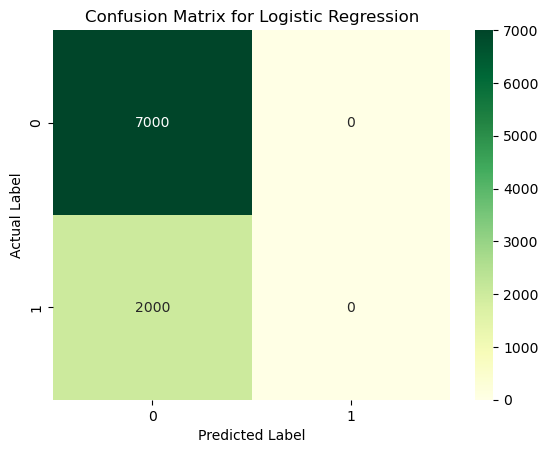

In [160]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cf4), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [161]:
from sklearn.metrics import classification_report
cr4 = classification_report(ytest, pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
print (cr4)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



# Model Developing using Linear Discriminant Analysis

In [163]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldm = LinearDiscriminantAnalysis()
ldm.fit(xtrain, ytrain)
pred = ldm.predict(xtest)
ldm.score(xtest, ytest)

0.8084444444444444

In [ ]:
#Performance Calculation

In [166]:
from sklearn.metrics import accuracy_score
as7 = accuracy_score(ytest, pred)
print ('Accuracy Score of Linear Discriminant Analysis is: ', as7 * 100, '%')

Accuracy Score of Linear Discriminant Analysis is:  80.84444444444443 %


In [167]:
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(ytest, pred)
print (cm7)

[[6789  211]
 [1513  487]]


Text(50.722222222222214, 0.5, 'Actual Label')

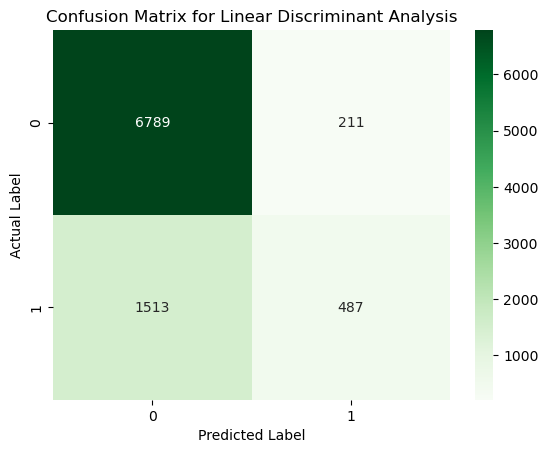

In [168]:
#Visualization of the Confusion Matrix
p = sns.heatmap(pd.DataFrame(cm7), annot = True, cmap = 'Greens', fmt = 'g')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [169]:
from sklearn.metrics import classification_report
cr7 = classification_report(ytest, pred)
print (cr7)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7000
           1       0.70      0.24      0.36      2000

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000

